#**Step 1 : Dataset Description**

Monet_tfrec, photo_tfrec, monet_jpg, and photo_jpg are the four directories that make up the dataset. The identical paintings can be found in both the monet_tfrec and monet_jpg categories, as well as the photo_tfrec and photo_jpg directories.Paintings by Monet can be found in the monet directory.
GANs can now extremely convincingly imitate things thanks to recent significant advancements in computer vision. But producing works of art that belong in museums is regarded as more art than science.

#**Step 2 : Exploratory Data Analysis**

**Download and unzipping the data**

In [18]:
!pip install mpimg

**Importing Libraries**

In [19]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mpimg
import random

In [20]:
img_path = os.listdir('/kaggle/input/gan-getting-started/photo_jpg')
func = lambda x : os.path.join('/kaggle/input/gan-getting-started/photo_jpg',x)
img_path = list(map(func,img_path))
img_path

['/kaggle/input/gan-getting-started/photo_jpg/fb97febc5f.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/c54c5368af.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/4a06596662.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/2629524a69.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/5e64b64de8.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/ed34d8d7f3.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/8eaf38146d.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/21c2c68337.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/74e1d0f495.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/1b98321823.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/db14eba4e1.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/bb40b8dd7f.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/6444bc3ca4.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/a6323ca7f3.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/593d5650ea.jpg',
 '/kaggle/input/gan-getting-started/photo_jpg/04f72d81b

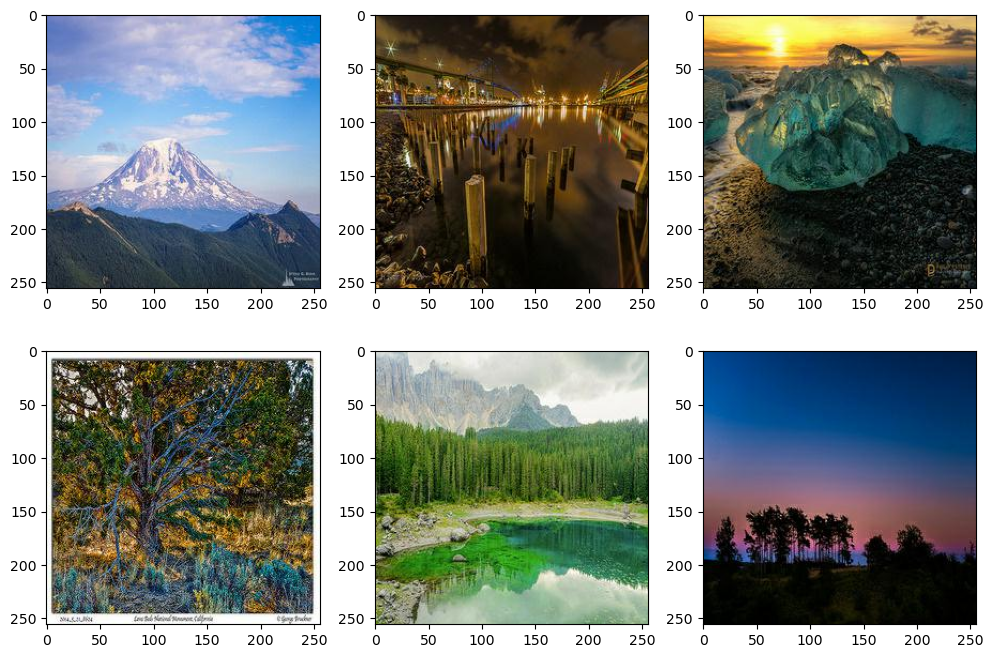

In [21]:
plt.figure(figsize=(12, 8))  # Corrected figsize syntax

for i in range(6):
    img = random.choice(img_path)
    img = plt.imread(img)

    plt.subplot(2, 3, i + 1)  # Adjusted subplot index
    plt.imshow(img)

plt.show()

In [22]:
print("The Image size : ",img.shape)
print("The number of image samples : ",len(img_path))

The Image size :  (256, 256, 3)
The number of image samples :  7038


In [23]:
def img_func(img):
  img = plt.imread(img)
  img = img.flatten()
  img = np.expand_dims(img,axis = 0)
  img = img/255
  return img

imgs = []
for idx,img in enumerate(img_path):
    temp_img = img_func(img)
    imgs.append(temp_img)
    if idx == 200:
      break

imgs = np.concatenate(imgs,axis = 0)
x_train = imgs
imgs.shape

(201, 196608)

#**Step 3 : Model building and Analysis**

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers

In [25]:
def create_generator():
    generator = Sequential()
    generator.add(Dense(units=512,input_dim = 100))
    generator.add(layers.ReLU())

    generator.add(Dense(units=512))
    generator.add(layers.ReLU())

    generator.add(Dense(units=1024))
    generator.add(layers.ReLU())

    generator.add(Dense(units = 65536*3,activation = "tanh"))
    generator.compile(loss = "binary_crossentropy",
                     optimizer = Adam(lr=0.0001,beta_1=0.5))
    return generator

g = create_generator()
g.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               51712     
                                                                 
 re_lu_6 (ReLU)              (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_7 (ReLU)              (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 1024)              525312    
                                                                 
 re_lu_8 (ReLU)              (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 196608)           

In [26]:
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units=1024,input_dim = 65536*3))
    discriminator.add(layers.ReLU())
    discriminator.add(layers.Dropout(0.4))

    discriminator.add(Dense(units=512))
    discriminator.add(layers.ReLU())
    discriminator.add(layers.Dropout(0.4))

    discriminator.add(Dense(units=256))
    discriminator.add(layers.ReLU())

    discriminator.add(Dense(units=1,activation="sigmoid"))
    discriminator.compile(loss="binary_crossentropy",
                         optimizer = Adam(lr=0.0001,beta_1=0.5))
    return discriminator

d = create_discriminator()
d.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              201327616 
                                                                 
 re_lu_9 (ReLU)              (None, 1024)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 re_lu_10 (ReLU)             (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)              

In [27]:
def create_gan(discriminator,generator):
    discriminator.trainable = False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs = gan_input,outputs = gan_output)
    gan.compile(loss="binary_crossentropy",optimizer="adam")
    return gan

gan = create_gan(d,g)
gan.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_2 (Sequential)   (None, 196608)            202362880 
                                                                 
 sequential_3 (Sequential)   (None, 1)                 201984001 
                                                                 
Total params: 404,346,881
Trainable params: 202,362,880
Non-trainable params: 201,984,001
_________________________________________________________________


In [ ]:
epochs = 1
batch_size = 256

for e in range(epochs):
    for _ in range(batch_size):
        noise = np.random.normal(0,1,[batch_size,100])
        generated_images = g.predict(noise)
        image_batch = x_train[np.random.randint(low = 0,high = x_train.shape[0],size = batch_size)]
        x = np.concatenate([image_batch,generated_images])
        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1

        d.trainable = True
        d.train_on_batch(x,y_dis)

        noise = np.random.normal(0,1,[batch_size,100])
        y_gen = np.ones(batch_size)
        d.trainable = False

        gan.train_on_batch(noise,y_gen)

    print("epochs",e)

8/8 [==============================] - 1s 170ms/step
